0 0.0
1 2.3268402652356404
2 4.653680530471281
3 6.980520795706921
4 9.307361060942561
5 11.634201326178202
6 13.961041591413842
7 16.287881856649484
8 18.614722121885123
9 20.94156238712076
10 23.268402652356404
11 25.595242917592046
12 27.922083182827684
13 30.248923448063323
14 32.57576371329897
15 34.90260397853461
16 37.229444243770246
17 39.556284509005884
18 41.88312477424152
19 44.20996503947717
20 46.53680530471281
21 48.863645569948446
22 51.19048583518409
23 53.51732610041973
24 55.84416636565537
25 58.17100663089101
26 60.497846896126646
27 62.82468716136229
28 65.15152742659794
29 67.47836769183357
30 69.80520795706921
31 72.13204822230485
32 74.45888848754049
33 76.78572875277614
34 79.11256901801177
35 81.43940928324741
36 83.76624954848305
37 86.09308981371869
38 88.41993007895434
39 90.74677034418997
40 93.07361060942561
41 95.40045087466126
42 97.72729113989689
43 100.05413140513254
44 102.38097167036818
45 104.70781193560381
46 107.03465220083946
47 109.3614924660750

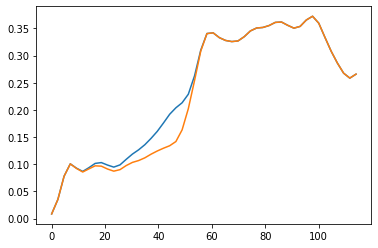

In [22]:
import numpy
import matplotlib.pyplot as plt

ismear = 10
delta_qsmear = 0.05 #meV
degaussq = 0.05 #meV
degaussw = 0.025 #eV
nqstep = 500
nqtotf = 50000
eps_acustic = 50 #cm-1

dq = 0.25

#file containing qf, wqf and iq/mode resolved frequencies
a2fdata_file = "P4nmm_e036_fc/a2f.data"

#file containing iq/mode resolved frequencies (meV) and linewidths (meV)
lw_file = "P4nmm_e036_fc/linewidth.phself_grid"

#file containing iq/mode resolved lambdas (meV)
lambda_file = "P4nmm_e036_fc/lambda.phself"

#a2f file for comparison (calculated for nqstep = 10000)
a2f_file = "P4nmm_e036_fc/P4nmm_e036_fc.a2f.01"

#____________________________________________________________________#
mev_to_cm1 = 8.06554
cm1_to_mev = 1/mev_to_cm1
mev_to_ry = 0.000073499
ry_to_mev = 1/mev_to_ry

delta_qsmear *= mev_to_cm1
degaussq *= mev_to_cm1
degaussw *= 1000 * mev_to_cm1

#get wf and calculate dw
wf_lw = numpy.loadtxt(lw_file, skiprows=2)
wf = wf_lw[:,2] * mev_to_cm1
nmodes = int(wf.size/nqtotf)
om_max = 1.1 * wf.max()
dw = om_max / nqstep

#get qf and wqf 
a2fdata = numpy.loadtxt("P4nmm_e036_fc/a2f.data")
qf = a2fdata[:,0:3]
wqf = a2fdata[:,3]

#get lambdas
lambda_all = numpy.loadtxt(lambda_file, skiprows=8)[:,1:1+nmodes] * mev_to_cm1

#load a2f
a2f = numpy.loadtxt(a2f_file)

def w0gauss(x):
    sqrtpm1 = 1.0/1.7724538509055160
    arg = min(200,x**2)
    return sqrtpm1 * numpy.exp(-arg)

def in_box(q,dq):
    for qx in q:
        if qx <= 0.5 + dq and qx >= 0.5 - dq:
            continue
        else:
            return False
    return True

n = 50

sigma = degaussq + (ismear-1) * delta_qsmear
a2F_temp = numpy.copy(a2F)
a2F = numpy.zeros(n)
for iw in range(0, n):
    iomega = iw * dw 
    print(iw, iomega)
    for iq in range(0, nqtotf):
        for imode in range(0, nmodes):
            index = iq*nmodes + imode
            w0 = wf[index]
            q = qf[iq]
            if w0 < eps_acustic and in_box(q, dq):
                continue
            else:
                l  = lambda_all[iq, imode]
                if l < 0:
                    l = 0
                a2F_tmp    = wqf[iq] * w0 * l / 2
                weight = w0gauss((iomega - w0)/sigma) / sigma
                a2F[iw] += a2F_tmp * weight


plt.figure(1)
plt.plot(range(0,n)*dw, a2F[0:n])
plt.plot(range(0,n)*dw, a2F_temp[0:n])
#plt.plot(range(0,n)*dw, a2f[0:n, ismear]*mev_to_cm1)
plt.show()